<a href="https://colab.research.google.com/github/MaykaS/Machine-Learning-A-Z-in-python-UDEMI-/blob/part2--Regression/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
#reshape Y to a 2di-array
Y= Y.reshape(len(Y),1) #row,column 
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [6]:
#apply to all (x&y)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor= SVR(kernel = 'rbf') #parameter = kernel
regressor.fit(X, Y)

## Predicting a new result

In [13]:
 #the value should be scaled & reverse scaling on Y
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))


array([170370.0204065])

## Visualising the SVR results

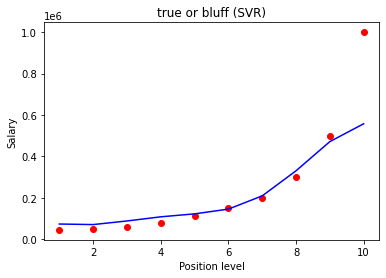

In [14]:
#back to origin scale
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('true or bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

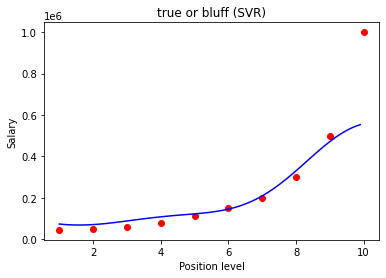

In [18]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('true or bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()